# Deep Learning Detection of 4 Stages of Alzheimer's Progression
by: Babs Khalidson 

## 1. Aim Of this Project

The aim of this project is to create an accurate model that is able to predict 4 stages of Alzheimers using a [neuroimaging dataset](https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images/data) acquired from Kaggle. 

In [1]:
from fastai.vision import *
import pandas as pd

## 2. Problem

Alzheimer’s disease (AD) is an irreversible, progressive brain disorder marked by cognitive decline with no validated cure [(De Strooper & Karran, 2016)](https://www.ncbi.nlm.nih.gov/pubmed/26871627). Hence, a great deal of effort has been made by the scientific community to detect it early to slow or prevent disease progression [(Galvin, 2017)](https://www.ncbi.nlm.nih.gov/pubmed/28766695). Advanced neuroimaging techniques such as magnetic resonance imaging (MRI) have been developed to identify structural and molecular biomarkers [(Veitch et al., 2019)](https://www.ncbi.nlm.nih.gov/pubmed/30321505). Nonetheless, analysis of large-scale neuroimaging data sets can be time-consuming requiring specialists to manually look for features in images that represent at a stage in disease progression.

## 3. Summary Of Strategy

Like the previous project on aquatic animal classification, stages in Alzheimer's can be predicted by CNNS using MRI imaging data. Knowing this, I acquired a +5000 MRI image dataset with an Open Database License (ODBL) from Kaggle, which contained 4 classes of images representing 4 stages of Alzheimer's progression: Non-Demented, Very Mildly Demented, Mildly Demented and Moderately Demented.


After that I trained, the CNN based on the 4 image classes. I initially got a **prediction accuracy of 75%** using ResNet50 (CNN model with 50 layers deep) without optimising the model. To improve the accuracy, I tried a different CNN model called ResNet101, which has been trained on more than a million images from the ImageNet Database, has 101 layers and can classify images into 1000 object categories. I also improved the accuracy by training the model multiple times with various parameters to find the optimal parameters. By doing so, I managed to increase the **prediction accuracy to 97.2%**

## 4.  Dataset

In [2]:
path = Path('/home/jupyter/tutorials/data/alzheimers/dataset2')


In [3]:
path.ls()

[PosixPath('/home/jupyter/tutorials/data/alzheimers/dataset2/MildDemented'),
 PosixPath('/home/jupyter/tutorials/data/alzheimers/dataset2/ModerateDemented'),
 PosixPath('/home/jupyter/tutorials/data/alzheimers/dataset2/NonDemented'),
 PosixPath('/home/jupyter/tutorials/data/alzheimers/dataset2/VeryMildDemented'),
 PosixPath('/home/jupyter/tutorials/data/alzheimers/dataset2/.ipynb_checkpoints')]

###  View data

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

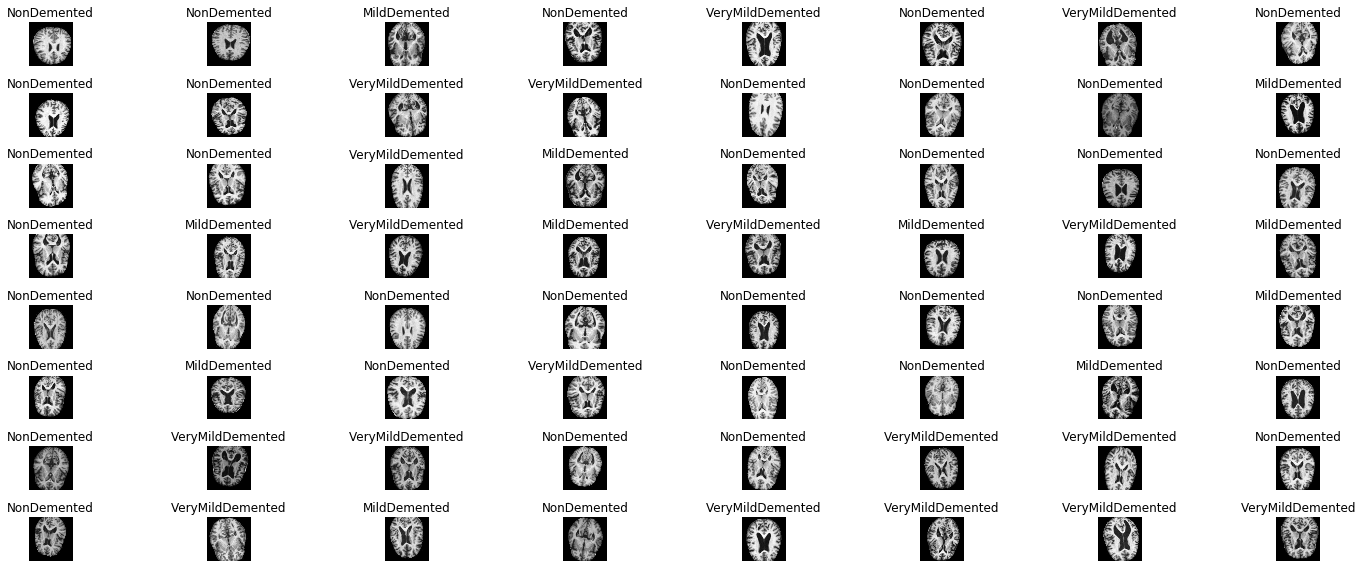

In [6]:
data.show_batch(rows=10, figsize=(20,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],
 4,
 5120,
 1280)

### 5. Train model

In [8]:
learn = cnn_learner(data, models.resnet101, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/jupyter/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.776778,1.074046,0.414844,00:38
1,1.162527,0.789314,0.351562,00:35
2,0.925900,0.738953,0.328125,00:35
3,0.817795,0.723591,0.330469,00:35


In [10]:
learn.save('stage-1') # Save the first stage of the model

### Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


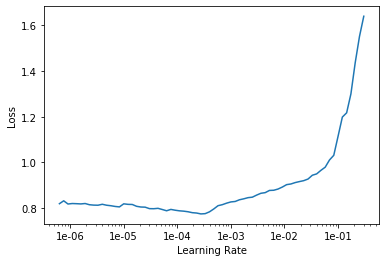

In [13]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.349589,0.339804,0.130469,00:47
1,0.318309,0.300266,0.114844,00:47
2,0.285110,0.298244,0.121094,00:47
3,0.233196,0.200228,0.067188,00:46
4,0.182968,0.191133,0.067188,00:46
5,0.142072,0.134315,0.053125,00:46
6,0.098427,0.101260,0.039062,00:46
7,0.081851,0.093935,0.033594,00:46
8,0.068827,0.084049,0.032812,00:47
9,0.063889,0.080533,0.028125,00:47


The model managed to achieve an accuracy of 97.2% That's a pretty accurate model!

In [19]:
learn.save('stage-2')

## 6. Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [20]:
learn.load('stage-2');

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

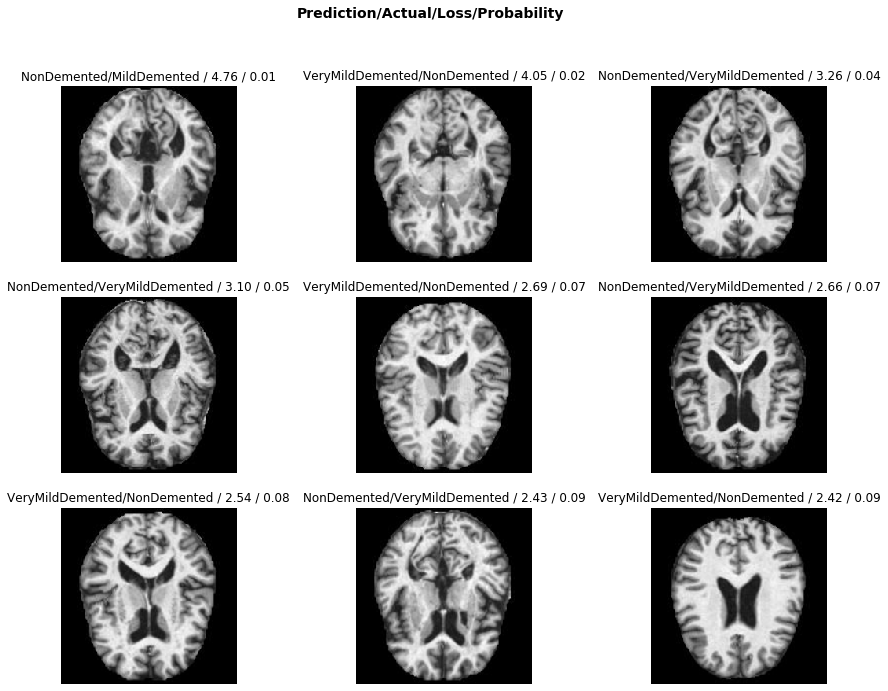

In [24]:
interp.plot_top_losses(9, figsize=(15,11))

In [25]:
doc(interp.plot_top_losses)

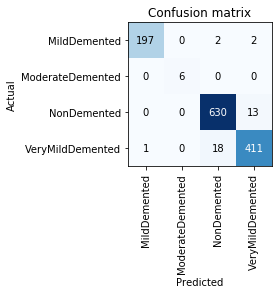

In [26]:
interp.plot_confusion_matrix()

## Viewing The Most Confused

Looks like 'Very Mild Demented' and 'Non Demented' appear to be the stages that get confused the most. These stages tend to have the greatest physiological similarities hence it is understandable why the model still falls short in classifying all of them

In [27]:
interp.most_confused(min_val=2)

[('VeryMildDemented', 'NonDemented', 18),
 ('NonDemented', 'VeryMildDemented', 13),
 ('MildDemented', 'NonDemented', 2),
 ('MildDemented', 'VeryMildDemented', 2)]

## 7. Conclusion

This model has produced a state-of-the art accuracy on this dataset as of January 2020, proving that they may be some potential in the usefulness of this model in industry. Future work would involve using larger datasets and potentially building applications that would enable the CNN models to make predictions at a larger scale.